
戦闘結果: victory
フォント 'Noto Sans CJK JP' を使用します


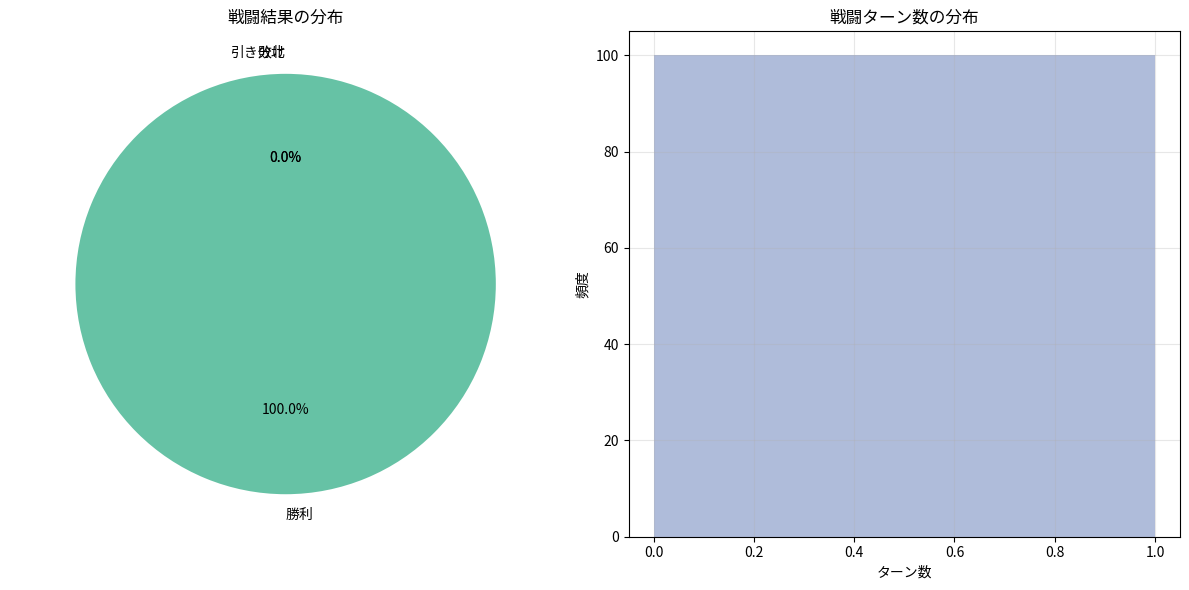


===== 視覚モードの戦闘 =====
戦闘: 勇者 vs スライム


AttributeError: 'BattleSystem' object has no attribute 'start_battle'

In [10]:
# main.ipynb

# RPGシミュレーター - メイン
# 
# このノートブックは、RPGシミュレーターのメインエントリーポイントです。
# 他のノートブックを読み込み、シミュレーションを実行します。

import os
import json
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output

# 他のノートブックを読み込む
%run notebooks/characters.ipynb
%run notebooks/battle_system.ipynb

# ## データディレクトリの確認と作成

# データディレクトリがなければ作成
data_dir = 'data'
if not os.path.exists(data_dir):
    os.makedirs(data_dir)
    print(f"'{data_dir}'ディレクトリを作成しました。")
else:
    print(f"'{data_dir}'ディレクトリは既に存在します。")

# ## サンプルデータファイルの作成

def create_sample_data_files():
    """サンプルのデータファイルを作成する"""
    
    # キャラクターデータ
    characters_data = [
        {
            "name": "勇者",
            "hp": 100,
            "mp": 50,
            "strength": 15,
            "defense": 10,
            "magic": 8,
            "speed": 12,
            "level": 1,
            "job": "戦士",
            "exp": 0,
            "next_level_exp": 100
        },
        {
            "name": "魔法使い",
            "hp": 70,
            "mp": 100,
            "strength": 6,
            "defense": 6,
            "magic": 18,
            "speed": 10,
            "level": 1,
            "job": "魔法使い",
            "exp": 0,
            "next_level_exp": 100
        },
        {
            "name": "盗賊",
            "hp": 80,
            "mp": 40,
            "strength": 12,
            "defense": 8,
            "magic": 7,
            "speed": 15,
            "level": 1,
            "job": "盗賊",
            "exp": 0,
            "next_level_exp": 100
        }
    ]
    
    # 敵データ
    enemies_data = [
        {
            "name": "スライム",
            "hp": 50,
            "mp": 0,
            "strength": 8,
            "defense": 5,
            "magic": 0,
            "speed": 6,
            "level": 1,
            "exp_reward": 15,
            "enemy_type": "通常"
        },
        {
            "name": "ゴブリン",
            "hp": 80,
            "mp": 10,
            "strength": 12,
            "defense": 8,
            "magic": 4,
            "speed": 10,
            "level": 2,
            "exp_reward": 25,
            "enemy_type": "通常"
        },
        {
            "name": "オオカミ",
            "hp": 65,
            "mp": 0,
            "strength": 14,
            "defense": 6,
            "magic": 0,
            "speed": 14,
            "level": 2,
            "exp_reward": 30,
            "enemy_type": "獣"
        },
        {
            "name": "ゴーレム",
            "hp": 150,
            "mp": 0,
            "strength": 18,
            "defense": 15,
            "magic": 0,
            "speed": 5,
            "level": 5,
            "exp_reward": 100,
            "enemy_type": "ボス"
        }
    ]
    
    # JSONファイルとして保存
    characters_file = os.path.join(data_dir, 'characters.json')
    enemies_file = os.path.join(data_dir, 'enemies.json')
    
    with open(characters_file, 'w', encoding='utf-8') as f:
        json.dump(characters_data, f, ensure_ascii=False, indent=4)
    
    with open(enemies_file, 'w', encoding='utf-8') as f:
        json.dump(enemies_data, f, ensure_ascii=False, indent=4)
    
    print(f"サンプルデータファイルを作成しました:")
    print(f"- {characters_file}")
    print(f"- {enemies_file}")

# サンプルデータファイルの作成
create_sample_data_files()

# ## データの読み込みと準備

# キャラクターと敵のデータを読み込む
characters = load_characters_from_json(os.path.join(data_dir, 'characters.json'))
enemies = load_enemies_from_json(os.path.join(data_dir, 'enemies.json'))

print("プレイヤーキャラクター:")
for character in characters:
    print(f"- {character.name} (Lv.{character.level} {character.job})")

print("\n敵キャラクター:")
for enemy in enemies:
    print(f"- {enemy.name} (Lv.{enemy.level} {enemy.enemy_type})")

# ## バトルシミュレーション

def run_single_battle():
    """1対1の戦闘をシミュレート"""
    
    print("\n===== 1対1の戦闘 =====")
    player = characters[0]  # 勇者
    enemy = enemies[0]      # スライム
    
    print(f"戦闘: {player.name} vs {enemy.name}")
    result, battle_log = simulate_battle([player], [enemy])
    
    print(f"\n戦闘結果: {result}")
    
    return result, battle_log

def run_team_battle():
    """チーム戦をシミュレート"""
    
    print("\n===== チーム戦 =====")
    player_team = characters[:2]  # 勇者と魔法使い
    enemy_team = enemies[:2]      # スライムとゴブリン
    
    player_names = [p.name for p in player_team]
    enemy_names = [e.name for e in enemy_team]
    
    print(f"戦闘: {' & '.join(player_names)} vs {' & '.join(enemy_names)}")
    result, battle_log = simulate_battle(player_team, enemy_team)
    
    print(f"\n戦闘結果: {result}")
    
    return result, battle_log

def run_boss_battle():
    """ボス戦をシミュレート"""
    
    print("\n===== ボス戦 =====")
    player_team = characters  # 全プレイヤー
    boss = [enemies[3]]       # ゴーレム
    
    player_names = [p.name for p in player_team]
    
    print(f"戦闘: {' & '.join(player_names)} vs {boss[0].name}")
    result, battle_log = simulate_battle(player_team, boss)
    
    print(f"\n戦闘結果: {result}")
    
    return result, battle_log

def run_balance_test(num_simulations=100):
    """バランステスト（複数回のシミュレーション）"""
    
    print(f"\n===== バランステスト ({num_simulations}回) =====")
    player = characters[0]  # 勇者
    enemy = enemies[0]      # スライム
    
    print(f"テスト: {player.name} vs {enemy.name} x {num_simulations}回")
    
    # 詳細ログなしで複数回シミュレーション
    stats = simulate_multiple_battles([player], [enemy], num_simulations, show_detailed_log=False)
    
    print(f"\n結果:")
    print(f"勝率: {stats['victory_rate']:.1f}%")
    print(f"平均ターン数: {stats['average_turns']:.1f}")
    print(f"平均戦闘時間: {stats['average_time']:.3f}秒")
    
    return stats
    
# 2025.3.19視覚モードでシングルバトルをテスト
def run_visual_battle():
    """視覚的表示付きの1対1の戦闘をシミュレート"""
    
    print("\n===== 視覚モードの戦闘 =====")
    player = characters[0]  # 勇者
    enemy = enemies[0]      # スライム
    
    print(f"戦闘: {player.name} vs {enemy.name}")
    # visual_modeをTrueに設定
    result, battle_log = simulate_battle([player], [enemy], show_detailed_log=False, visual_mode=True)
    
    print(f"\n戦闘結果: {result}")
    
    return result, battle_log

# ## 戦闘分析と可視化

def visualize_battle_stats(stats):
    """戦闘統計を可視化"""
    
    # 日本語フォント設定の修正
    try:
        # まずmatplotlibで利用可能なフォントを確認
        import matplotlib.font_manager as fm
        fonts = [f.name for f in fm.fontManager.ttflist]
        
        # 一般的な日本語フォントのリスト
        japanese_fonts = ['IPAGothic', 'MS Gothic', 'Hiragino Sans', 'Meiryo', 'TakaoGothic', 
                          'Noto Sans CJK JP', 'Yu Gothic', 'sans-serif']
        
        # システムにある日本語フォントを探して設定
        for font in japanese_fonts:
            if font in fonts:
                plt.rcParams['font.family'] = font
                print(f"フォント '{font}' を使用します")
                break
        else:
            # 日本語フォントが見つからない場合はデフォルトフォントを使用
            print("日本語フォントが見つかりませんでした。デフォルトフォントを使用します")
            plt.rcParams['font.family'] = 'sans-serif'
            # ラベルを英語に変更
            labels = ['Victory', 'Defeat', 'Draw']
    except Exception as e:
        print(f"フォント設定エラー: {e}")
        plt.rcParams['font.family'] = 'sans-serif'
        # ラベルを英語に変更
        labels = ['Victory', 'Defeat', 'Draw']
    
    plt.figure(figsize=(12, 6))
    
    # 勝敗グラフ
    plt.subplot(1, 2, 1)
    if 'labels' not in locals():
        labels = ['勝利', '敗北', '引き分け']
    sizes = [stats['victory'], stats['defeat'], stats['draw']]
    colors = ['#66c2a5', '#fc8d62', '#8da0cb']
    
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title('Battle Results Distribution' if 'Victory' in labels else '戦闘結果の分布')
    
    # ターン数分布
    plt.subplot(1, 2, 2)
    turn_counts = [len([log for log in logs if "ターン" in str(log) and "====" in str(log)]) for logs in stats['logs']]
    plt.hist(turn_counts, bins=range(min(turn_counts) if turn_counts else 0, 
                                    max(turn_counts) + 2 if turn_counts else 10), 
             alpha=0.7, color='#8da0cb')
    plt.xlabel('Turns' if 'Victory' in labels else 'ターン数')
    plt.ylabel('Frequency' if 'Victory' in labels else '頻度')
    plt.title('Battle Turn Distribution' if 'Victory' in labels else '戦闘ターン数の分布')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()


# シングルバトルをテスト
single_result, single_log = run_single_battle()

# チーム戦をテスト
team_result, team_log = run_team_battle()

# ボス戦をテスト
boss_result, boss_log = run_boss_battle()

# バランステスト
balance_stats = run_balance_test(100)

# 視覚モードの戦闘テスト
visual_result, visual_log = run_visual_battle()

# 戦闘統計を可視化
visualize_battle_stats(balance_stats)
# RPGシミュレーター - バトル画面表示の統合


class BattleSystem:
    # 既存のコードはそのままに、以下のメソッドを追加または修正
    
    def __init__(self, player_team: List[PlayerCharacter], enemy_team: List[Enemy],
                 show_detailed_log: bool = True, visual_mode: bool = False):
        """戦闘システムの初期化
        
        Args:
            player_team: プレイヤーキャラクターのリスト
            enemy_team: 敵キャラクターのリスト
            show_detailed_log: 詳細な戦闘ログを表示するかどうか
            visual_mode: 視覚的表示モードを使用するかどうか
        """
        self.player_team = player_team
        self.enemy_team = enemy_team
        self.battle_log = BattleLog()
        self.show_detailed_log = show_detailed_log
        self.visual_mode = visual_mode
        self.current_turn = 0
    
def _player_action(self, character: PlayerCharacter) -> None:
    """プレイヤーキャラクターの行動を処理
    
    Args:
        character: 行動するプレイヤーキャラクター
    """
    # シンプルな実装：最初の生存している敵に攻撃
    alive_enemies = [enemy for enemy in self.enemy_team if enemy.is_alive]
    
    if not alive_enemies:
        return
    
    target = alive_enemies[0]
    message = f"{character.name}の攻撃！"
    self._print_battle_message(message)
    
    # 視覚モードの場合、攻撃前の状態を表示
    if self.visual_mode:
        display_battle_scene(character, target, self.current_turn, message)
        time.sleep(0.8)
        clear_output(wait=True)
    
    damage = character.attack(target)
    message = f"{target.name}に{damage}のダメージ！"
    self._print_battle_message(message)
    
    # 視覚モードの場合、攻撃後の状態を表示
    if self.visual_mode:
        display_battle_scene(character, target, self.current_turn, message)
        time.sleep(0.8)
        clear_output(wait=True)
    
    # 行動を記録
    self.battle_log.add_action(character, 'attack', target, damage=damage)
    
    # 敵が倒れた場合
    if not target.is_alive:
        message = f"{target.name}を倒した！"
        self._print_battle_message(message)
        
        if self.visual_mode:
            display_battle_scene(character, target, self.current_turn, message)
            time.sleep(0.8)
            clear_output(wait=True)

def _enemy_action(self, enemy: Enemy) -> None:
    """敵キャラクターの行動を処理
    
    Args:
        enemy: 行動する敵キャラクター
    """
    # 行動対象の候補
    alive_players = [player for player in self.player_team if player.is_alive]
    
    if not alive_players:
        return
    
    # 敵AIで行動を決定
    action = enemy.get_action(alive_players)
    
    if action['type'] == 'attack':
        target = action['target']
        message = f"{enemy.name}の攻撃！"
        self._print_battle_message(message)
        
        # 視覚モードの場合、攻撃前の状態を表示
        if self.visual_mode:
            display_battle_scene(target, enemy, self.current_turn, message)
            time.sleep(0.8)
            clear_output(wait=True)
        
        damage = enemy.attack(target)
        message = f"{target.name}に{damage}のダメージ！"
        self._print_battle_message(message)
        
        # 視覚モードの場合、攻撃後の状態を表示
        if self.visual_mode:
            display_battle_scene(target, enemy, self.current_turn, message)
            time.sleep(0.8)
            clear_output(wait=True)
        
        # 行動を記録
        self.battle_log.add_action(enemy, 'attack', target, damage=damage)
        
        # プレイヤーが倒れた場合
        if not target.is_alive:
            message = f"{target.name}は倒れた！"
            self._print_battle_message(message)
            
            if self.visual_mode:
                display_battle_scene(target, enemy, self.current_turn, message)
                time.sleep(0.8)
                clear_output(wait=True)

# 視覚モードでシングルバトルをテスト
def run_visual_battle():
    """視覚的表示付きの1対1の戦闘をシミュレート"""
    
    print("\n===== 視覚モードの戦闘 =====")
    player = characters[0]  # 勇者
    enemy = enemies[0]      # スライム
    
    print(f"戦闘: {player.name} vs {enemy.name}")
    # visual_modeをTrueに設定
    result, battle_log = simulate_battle([player], [enemy], show_detailed_log=False, visual_mode=True)
    
    print(f"\n戦闘結果: {result}")
    
    return result, battle_log

# 視覚モードの戦闘テスト
visual_result, visual_log = run_visual_battle()
# 戦闘統計を可視化
visualize_battle_stats(balance_stats)

# ## まとめと次のステップ

print("\n===== RPGシミュレーター サマリー =====")
print("実装済みの機能:")
print("- 基本キャラクタークラス")
print("- プレイヤーキャラクターと敵クラス")
print("- 基本的な戦闘システム")
print("- 戦闘ログと分析")
print("- JSONデータの読み込み")

print("\n次のステップ:")
print("1. スキルシステムの実装")
print("2. 装備品システムの実装")
print("3. より洗練された敵AI")
print("4. 詳細な戦闘分析とバランス調整ツール")